In [93]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [94]:
from __future__ import print_function
import keras
from keras.models import load_model
import os
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import random

In [95]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


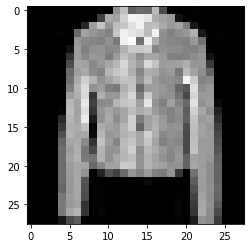

In [96]:
plt.imshow(testX[10],cmap="gray")  #örnek görüntü

In [97]:
labels=["tişört",
        "pantolon",
        "kazak",
        "elbise",
        "ceket",
        "sandalet",
        "gömlek",
        "sneaker",
        "çanta",
        "bilek_bot"]

In [98]:
from keras import backend as K

In [99]:
K.image_data_format="channels_last"

In [100]:
if K.image_data_format=="channels_last":
  trainX=trainX.reshape(trainX.shape[0],28,28,1) 
  testX=testX.reshape(testX.shape[0],28,28,1) 
  input_shape=(28,28,1)
if K.image_data_format=="channels_first":
  trainX=trainX.reshape(trainX.shape[0],1,28,28) 
  testX=testX.reshape(testX.shape[0],1,28,28) 
  input_shape=(1,28,28)


In [101]:
input_shape

(28, 28, 1)

In [102]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
# one-hot encode the training and testing labels
trainY = keras.utils.to_categorical(trainY, 10)
testY = keras.utils.to_categorical(testY, 10)

In [103]:
from keras.models import Sequential,load_model
from keras.layers import MaxPooling2D,Dense,Conv2D,Dropout,Flatten

In [104]:
model=Sequential()

In [105]:
model.add(Conv2D(32,kernel_size=(3,3),
                 activation="relu",
                 input_shape=input_shape))

model.add(Conv2D(32,(3,3),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),
                 activation="relu"))

model.add(Conv2D(64,(3,3),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation="relu",))

model.add(Dropout(0.5))

model.add(Dense(10,activation="softmax"))


In [106]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-2, momentum=0.9, decay=1e-2 / 25),
              metrics=["accuracy"],
              loss=keras.losses.categorical_crossentropy)

In [107]:
print(testX.shape,testY.shape,trainX.shape,trainY.shape)

(10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)         

In [109]:
model.fit(trainX,trainY,batch_size=32, 
          epochs=5,
          verbose=1,
          validation_data=(testX,testY)) 

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6753 - accuracy: 0.7444 - val_loss: 0.4327 - val_accuracy: 0.8351
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4252 - accuracy: 0.8429 - val_loss: 0.3592 - val_accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3686 - accuracy: 0.8640 - val_loss: 0.3181 - val_accuracy: 0.8799
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3387 - accuracy: 0.8743 - val_loss: 0.2978 - val_accuracy: 0.8915
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3178 - accuracy: 0.8835 - val_loss: 0.2848 - val_accuracy: 0.8936


In [110]:
ls


'My Drive'/


In [111]:
model.save("My Drive/fashion_mnist_model.h5")

In [112]:
score=model.evaluate(testX,testY,verbose=0)
print("loss: ",score[0])
print("accuracy: ",score[1])

loss:  0.2847612500190735
accuracy:  0.8935999870300293


In [113]:
from sklearn.metrics import classification_report

In [114]:
preds = model.predict(testX)
# show a nicely formatted classification report

print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labels))

              precision    recall  f1-score   support

      tişört       0.84      0.84      0.84      1000
    pantolon       0.99      0.98      0.98      1000
       kazak       0.81      0.89      0.85      1000
      elbise       0.89      0.90      0.89      1000
       ceket       0.80      0.85      0.82      1000
    sandalet       0.98      0.97      0.98      1000
      gömlek       0.74      0.61      0.67      1000
     sneaker       0.94      0.98      0.96      1000
       çanta       0.96      0.98      0.97      1000
   bilek_bot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2697 - accuracy: 0.9018 - val_loss: 0.2510 - val_accuracy: 0.9065
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2663 - accuracy: 0.9020 - val_loss: 0.2487 - val_accuracy: 0.9077
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2613 - accuracy: 0.9047 - val_loss: 0.2431 - val_accuracy: 0.9100
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9065 - val_loss: 0.2405 - val_accuracy: 0.9110
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2553 - accuracy: 0.9056 - val_loss: 0.2416 - val_accuracy: 0.9090


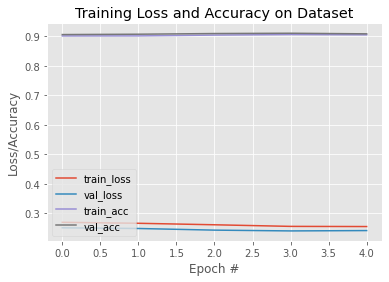

In [123]:
N = 5
H=model.fit(trainX,trainY,batch_size=32, 
          epochs=5,
          verbose=1,
          validation_data=(testX,testY)) 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
